In [0]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from textblob import Word
import re
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [0]:
from google.colab import drive
drive.mount('/content/drive')
main_directory = '/content/drive/My Drive/Thesis/Thesis Codes 4_2/Dataset/train.csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv(main_directory,encoding = 'ISO-8859-1')
data.head()

,label,id,date,query,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [0]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
data['tweet'] = data['tweet'].str.replace('[^\w\s]',' ')

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop = stopwords.words('english')
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [0]:
freq = pd.Series(' '.join(data['tweet']).split()).value_counts()[-10000:]

In [0]:
freq = list(freq.index)
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


In [0]:
lbl_enc = preprocessing.LabelEncoder()
y = data.label.values
print(lbl_enc)
print(y)

LabelEncoder()
[0 0 0 ... 4 4 4]


In [0]:
X_train, X_val, y_train, y_val = train_test_split(data.tweet.values, y, stratify=y, random_state=42, test_size=0.1, shuffle=True)

In [0]:
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.fit_transform(X_val)

In [0]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['tweet'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

In [0]:
# Model 1: Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_val_tfidf)
print('Naive Bayes tfidf accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))

Naive Bayes tfidf accuracy 0.748154647237216
              precision    recall  f1-score   support

           0       0.97      0.77      0.85    100872
           4       0.05      0.31      0.08      3986

    accuracy                           0.75    104858
   macro avg       0.51      0.54      0.47    104858
weighted avg       0.93      0.75      0.82    104858

[[77232 23640]
 [ 2768  1218]]


In [0]:
# Model 2: Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
print('SVM using tfidf accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))

SVM using tfidf accuracy 0.7616300139235919
              precision    recall  f1-score   support

           0       1.00      0.76      0.86    104477
           4       0.00      0.32      0.01       381

    accuracy                           0.76    104858
   macro avg       0.50      0.54      0.44    104858
weighted avg       0.99      0.76      0.86    104858

[[79741 24736]
 [  259   122]]


In [0]:
# Model 3: logistic regression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
print('Logistic regression tfidf accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic regression tfidf accuracy 0.7340307844895001
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     95867
           4       0.12      0.33      0.18      8991

    accuracy                           0.73    104858
   macro avg       0.52      0.55      0.51    104858
weighted avg       0.86      0.73      0.78    104858

[[73989 21878]
 [ 6011  2980]]


In [0]:
## Building models using count vectors feature
# Model 1: Multinomial Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred = nb.predict(X_val_count)
print('Naive Bayes count vectors accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))

Naive Bayes count vectors accuracy 0.8251826279349215
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     88541
           4       0.46      0.70      0.55     16317

    accuracy                           0.83    104858
   macro avg       0.70      0.77      0.72    104858
weighted avg       0.86      0.83      0.84    104858

[[75105 13436]
 [ 4895 11422]]


In [0]:
# Model 2: Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_count, y_train)
y_pred = lsvm.predict(X_val_count)
print('Linear SVM using count vectors accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))

Linear SVM using count vectors accuracy 0.7778614888706632
              precision    recall  f1-score   support

           0       0.99      0.78      0.87    101349
           4       0.10      0.72      0.18      3509

    accuracy                           0.78    104858
   macro avg       0.54      0.75      0.53    104858
weighted avg       0.96      0.78      0.85    104858

[[79028 22321]
 [  972  2537]]


In [0]:
# Model 3: Logistic Regression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_count, y_train)
y_pred = logreg.predict(X_val_count)
print('Logistic regression count vectors accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_pred,y_val))
print(confusion_matrix(y_pred,y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic regression count vectors accuracy 0.8338801045223063
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     87147
           4       0.51      0.71      0.59     17711

    accuracy                           0.83    104858
   macro avg       0.72      0.78      0.74    104858
weighted avg       0.86      0.83      0.84    104858

[[74864 12283]
 [ 5136 12575]]


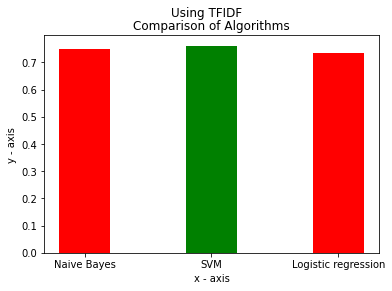

In [0]:
# plot algorithm comparison


# x-coordinates of left sides of bars
left = [1, 2, 3]

# heights of bars
height1 = [0.7482, 0.7616, 0.7340]


# labels for bars
tick_label1 = ['Naive Bayes', 'SVM', 'Logistic regression']

# plotting a bar chart
plt.bar(left, height1, tick_label=tick_label1,
        width=0.4, color=['red', 'green'])

# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Comparison of Algorithms')
plt.suptitle('Using TFIDF')

# function to show the plot
plt.show()

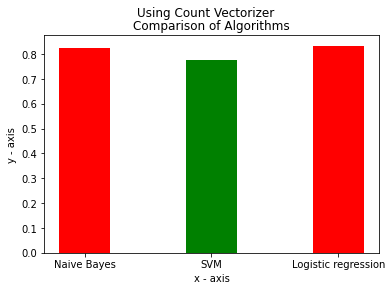

In [0]:
# x-coordinates of left sides of bars
left = [1, 2, 3]

# heights of bars
height2 = [0.8252, 0.7779, 0.8339]


# labels for bars
tick_label2 = ['Naive Bayes', 'SVM', 'Logistic regression']

# plotting a bar chart
plt.bar(left, height2, tick_label=tick_label2,
        width=0.4, color=['red', 'green'])

# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Comparison of Algorithms')
plt.suptitle('Using Count Vectorizer')

# function to show the plot
plt.show()